In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
news = pd.read_csv('news_articles.csv')

news.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [7]:
news.shape

(2096, 12)

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [9]:
#Check for missing values
missing_values = news.isnull().sum()
missing_percentage = (missing_values / len(news)) * 100

missing_data = pd.DataFrame({'Missing Values' : missing_values, 'Percentage' : missing_percentage})

print(missing_data.sort_values(by= 'Percentage', ascending=False))

                         Missing Values  Percentage
text_without_stopwords               50    2.385496
text                                 46    2.194656
title_without_stopwords               2    0.095420
language                              1    0.047710
site_url                              1    0.047710
main_img_url                          1    0.047710
type                                  1    0.047710
label                                 1    0.047710
hasImage                              1    0.047710
author                                0    0.000000
published                             0    0.000000
title                                 0    0.000000


In [21]:
news = news.dropna()

In [22]:
news.duplicated().sum()

7

In [24]:
news = news.drop_duplicates()

In [25]:
news.shape

(962, 14)

In [26]:
unique_values = {}
for col in news.columns:
    unique_values[col] =news[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
author,316
published,931
title,739
text,890
language,3
site_url,47
main_img_url,539
type,8
label,2
title_without_stopwords,739


In [27]:
for col in news:
  print(news[col].value_counts())
  print("-" * 50)

author
No Author          258
admin               48
Anonymous           31
Jason Easley        28
-NO AUTHOR-         22
                  ... 
Mirror.co.uk         1
Astronomy            1
Jonathan Lee         1
David Knight         1
Jerome R. Corsi      1
Name: count, Length: 316, dtype: int64
--------------------------------------------------
published
2016-10-29 14:00:00+03:00           6
2016-10-29 09:34:00+03:00           5
2016-10-29 22:25:00+03:00           4
2016-10-27 21:30:00+03:00           4
2016-10-27 03:00:00+03:00           4
                                   ..
2016-10-29 00:46:03.067000+03:00    1
2016-10-29 00:46:08.446000+03:00    1
2016-10-29 00:46:09.330000+03:00    1
2016-10-28 23:34:00+03:00           1
2016-10-27 03:05:05.815000+03:00    1
Name: count, Length: 931, dtype: int64
--------------------------------------------------
title
no title                                                                                 143
our new country women and minorit

In [10]:
#Distribution of article types
type_distribution = news['type'].value_counts()

#Distribution of article labels
label_distribution = news['label'].value_counts()

print(type_distribution)
print(label_distribution)

type
bs            601
bias          436
conspiracy    430
hate          244
satire        146
state         121
junksci       102
fake           15
Name: count, dtype: int64
label
Fake    1294
Real     801
Name: count, dtype: int64


label
Fake    601
Real    361
Name: count, dtype: int64


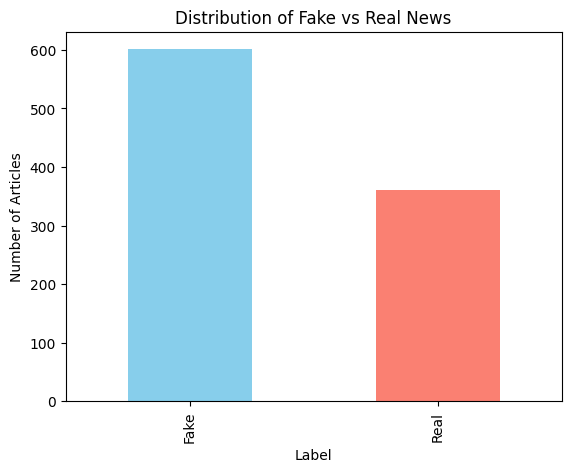

In [28]:
# Distribution of fake vs real news
print(news['label'].value_counts())


news['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.show()

In [19]:
#Convert the 'published' column to datetime format
news['published'] = pd.to_datetime(news['published'], errors='coerce')

#Extract year and month
news['year'] = news['published'].dt.year
news['month'] = news['published'].dt.month
print(news[['published', 'year', 'month']].head())

print(news['published'].isnull().sum())

#Group by year and month
publication_trend = news.groupby(['year', 'month']).size().reset_index(name = 'count')

print(publication_trend.head())

                         published    year  month
0        2016-10-26 21:41:00+03:00  2016.0   10.0
1 2016-10-29 08:47:11.259000+03:00  2016.0   10.0
2                              NaT     NaN    NaN
3                              NaT     NaN    NaN
4                              NaT     NaN    NaN
1077
     year  month  count
0  2016.0   10.0   1019


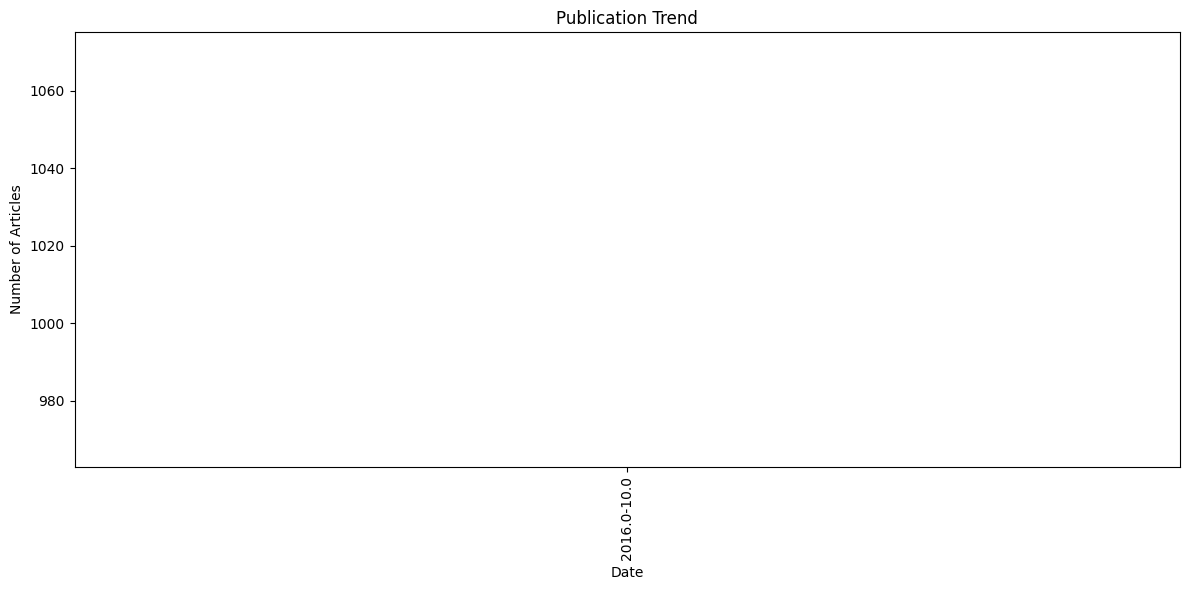

In [20]:
#Plot publication trend
plt.figure(figsize=(12, 6))
plt.plot(publication_trend['year'].astype(str) + '-' + publication_trend['month'].astype(str), publication_trend['count'])
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Trend')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Distribution of article languages
language_distribution = news['language'].value_counts()

print(language_distribution)


language
english    2017
german       72
ignore        3
french        2
spanish       1
Name: count, dtype: int64


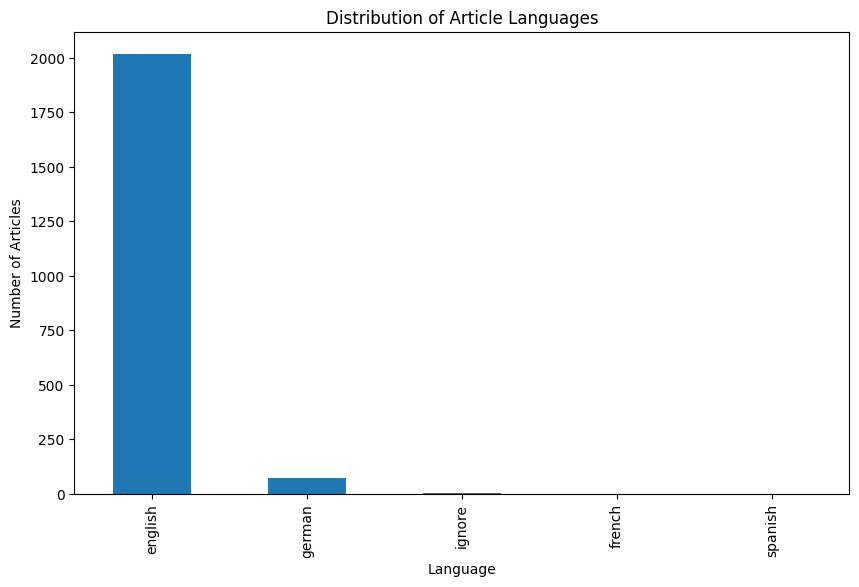

In [15]:

# Plot language distribution
plt.figure(figsize=(10, 6))
language_distribution.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Languages')
plt.show()


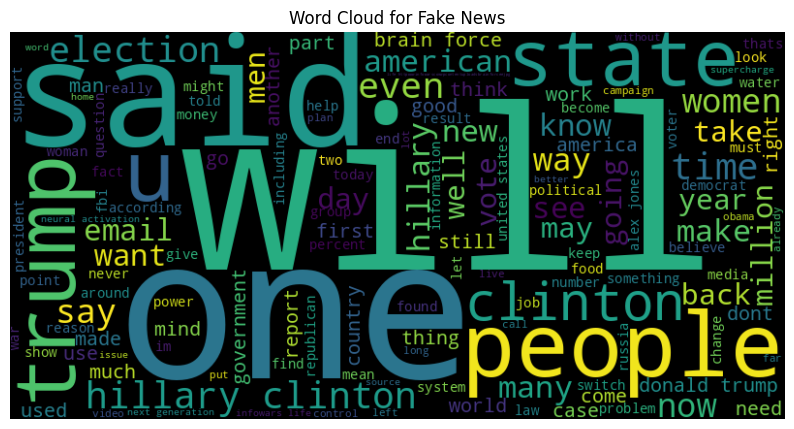

In [29]:
from wordcloud import WordCloud

# Word Cloud for Fake News
fake_news = ' '.join(news[news['label'] == 'Fake']['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

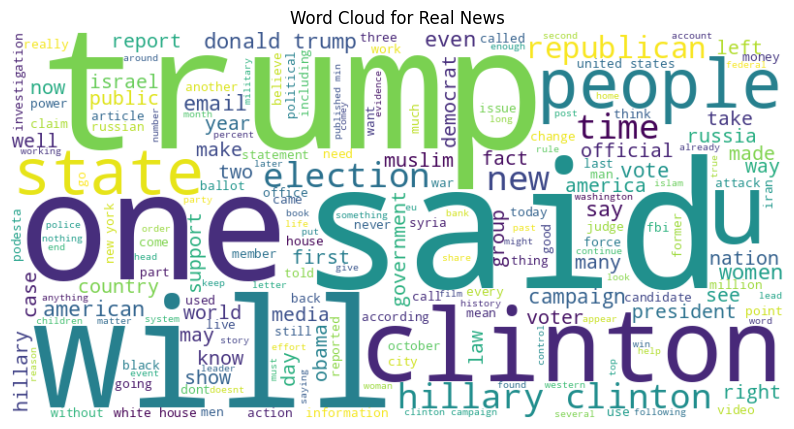

In [30]:
# Word Cloud for Real News
real_news = ' '.join(news[news['label'] == 'Real']['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()